In [1]:
from local_tree_decomp import *

# from local_helpers import *
from help_functions import *

# from local_hom_count import *
# from local_hom_count_int import *
from local_hom_count_best import *
# from local_hom_count_int_dict import *

# from hom_count_bounded_degree import *


In [3]:
graph = graphs.CompleteBipartiteGraph(1, 2)
target_graph = graphs.CompleteGraph(4)

graph_clr = [1, 0, 1]
target_clr = [1, 1, 1, 0]

count_homomorphisms_best(graph, target_graph, 0.5, graph_clr, target_clr, colourful=True)

6

In [16]:
graph = graphs.CompleteBipartiteGraph(1, 3)
random_graph = graphs.RandomGNP(1, 0.55, seed=42)

%prun count_homomorphisms_best(graph, random_graph)

         3635 function calls (3564 primitive calls) in 0.006 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       24    0.001    0.000    0.001    0.000 set.py:472(__init__)
       59    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
      393    0.000    0.000    0.001    0.000 set.py:1046(__hash__)
      393    0.000    0.000    0.000    0.000 set.py:1018(frozenset)
        1    0.000    0.000    0.003    0.003 local_tree_decomp.py:5(make_nice_tree_decomposition)
        1    0.000    0.000    0.006    0.006 local_hom_count_best.py:10(count_homomorphisms_best)
      545    0.000    0.000    0.000    0.000 set.py:767(object)
      152    0.000    0.000    0.000    0.000 set.py:995(set)
       28    0.000    0.000    0.000    0.000 digraph.py:1223(neighbor_out_iterator)
        5    0.000    0.000    0.000    0.000 generic_graph.py:11768(add_edges)
      3/2    0.000    0.000    0.001    0.000 graph.p

In [ ]:
count_homomorphisms_best(graph, random_graph)

In [9]:
1.0 * random_graph.density()

0.803983935742972

In [6]:
%load_ext line_profiler

from local_hom_count_best import count_homomorphisms_best

%lprun -f count_homomorphisms_best(graph, target_graph)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


UsageError: Could not find module count_homomorphisms_best(graph,.
SyntaxError: '(' was never closed (<string>, line 1)


In [ ]:
def speed_test(graph, target_graph, naive=True):
    basic_result = count_homomorphisms(graph, target_graph)
    int_rep_result = count_homomorphisms_int(graph, target_graph)
    better_int_rep_result = count_homomorphisms_int_pre(graph, target_graph)
    dict_int_rep_result = count_homomorphisms_int_dict(graph, target_graph)

    results = [basic_result, int_rep_result, better_int_rep_result, dict_int_rep_result]

    if naive:
        brute_force_result = len(enumerate_homomorphisms(graph, target_graph))
        results.append(brute_force_result)

    if all(result == better_int_rep_result for result in results):
        print('result:', better_int_rep_result)

        if naive:
            print('\nBrute force:')
            %timeit len(enumerate_homomorphisms(graph, target_graph))
        
        print('\nBasic:')
        %timeit count_homomorphisms(graph, target_graph)
        
        print('\nInt representation:')
        %timeit count_homomorphisms_int(graph, target_graph)
    
        print('\nBetter int representation:')
        %timeit count_homomorphisms_int_pre(graph, target_graph)

        print('\nDict int representation:')
        %timeit count_homomorphisms_int_dict(graph, target_graph)


In [ ]:
g = graphs.CycleGraph(4)

tree_decomp = g.treewidth(certificate=True)
nice_tree_decomp = make_nice_tree_decomposition(g, tree_decomp)
root = sorted(nice_tree_decomp)[0]
dir_labelled_TD = label_nice_tree_decomposition(nice_tree_decomp, root, directed=True)

In [ ]:
g

In [ ]:
for i in dir_labelled_TD.vertices():
    print(i, dir_labelled_TD.get_vertex(i))

In [ ]:
dir_labelled_TD.edges(labels=False)

In [ ]:
dir_labelled_TD

In [ ]:
dir_labelled_TD.vertices()

In [ ]:
node_changes(dir_labelled_TD)

In [ ]:
from local_hom_count_colour import *

graph = graphs.CompleteBipartiteGraph(1, 2)
target_graph = graphs.CompleteGraph(3)

graph_clr = [0, 1, 2]
target_clr = [0, 1, 2]

count_homomorphisms_best_colour(graph, target_graph, graph_clr, target_clr)

In [ ]:
graph

In [ ]:
target_graph

In [23]:
graph = graphs.CompleteBipartiteGraph(1, 4)
tree_decomp = graph.treewidth(certificate=True)
nice_tree_decomp = make_nice_tree_decomposition(graph, tree_decomp)
root = sorted(nice_tree_decomp)[0]
dir_labelled_TD = label_nice_tree_decomposition(nice_tree_decomp, root, directed=True)

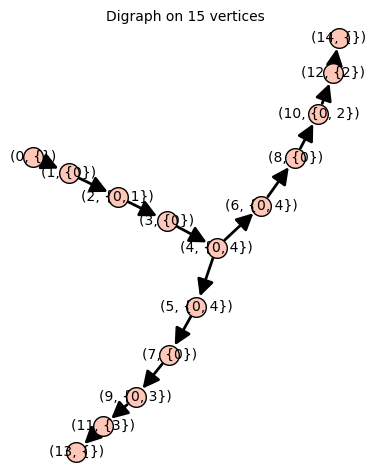

In [24]:
dir_labelled_TD

In [9]:
def best_speed_test(graph, target_graph, graph_clr, target_clr):
    # best_result = count_homomorphisms_best(graph, target_graph)
    # best_colour_result = count_homomorphisms_best_colour(graph, target_graph, graph_clr, target_clr)

    print('Best result:')
    %timeit count_homomorphisms_best(graph, target_graph, density_threshold=2)

    print('\nBest colour result:')
    %timeit count_homomorphisms_best(graph, target_graph, 2, graph_clr, target_clr, True)


In [10]:
import random
random.seed(int(42))

graph = graphs.CompleteBipartiteGraph(1, 2)
# target_graph = graphs.CompleteGraph(3)

graph_clr = [0, 1, 1]
# target_clr = [0, 1, 2]

for i in range(1, 11):
    N = i * 10
    random_graph = graphs.RandomGNP(N, 0.5, seed=42)
    random_clr = [random.randint(0, 1) for _ in range(N)]
    print('N: ', N)
    best_speed_test(graph, random_graph, graph_clr, random_clr)
    print()

N:  10
Best result:
4.18 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Best colour result:
4.9 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

N:  20
Best result:
7.23 ms ± 630 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Best colour result:
13.5 ms ± 3.57 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

N:  30
Best result:
13 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)

Best colour result:
27.7 ms ± 3.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

N:  40
Best result:
15.9 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Best colour result:
58.8 ms ± 8.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

N:  50
Best result:
24.5 ms ± 4.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Best colour result:
85 ms ± 6.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

N:  60
Best result:
30.8 ms ± 4.27 ms per loop (mean ± std. dev. of 7 runs, 10 loop

KeyboardInterrupt: 

In [ ]:
import random

graph = graphs.CompleteBipartiteGraph(1, 3)
graph_clr = [0, 1, 1, 1]

target_graph = graphs.PetersenGraph()

max_num = 0

for _ in range(500):
    random_clr = [random.randint(0, 1) for _ in range(10)]
    num = count_homomorphisms_best(graph, target_graph, graph_clr, random_clr, colourful=True)
    if num > max_num:
        max_num = num

print(max_num)

In [ ]:
count_homomorphisms_best(graph, target_graph)

In [27]:
graph = graphs.CompleteBipartiteGraph(1, 4)
target_graph = graphs.RandomGNP(400, 0.4, seed=42)
%timeit count_homomorphisms_best(graph, target_graph)

3.26 s ± 242 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
